In [1]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm

In [2]:
filepath = '/Users/jmtzmo/Downloads/sla_for_tracking/sla_0.25degs_interp_for_eddy_tracking_l4-duacs.nc'

In [3]:
TEddy = TrackEddy(path=filepath,variable='sla')

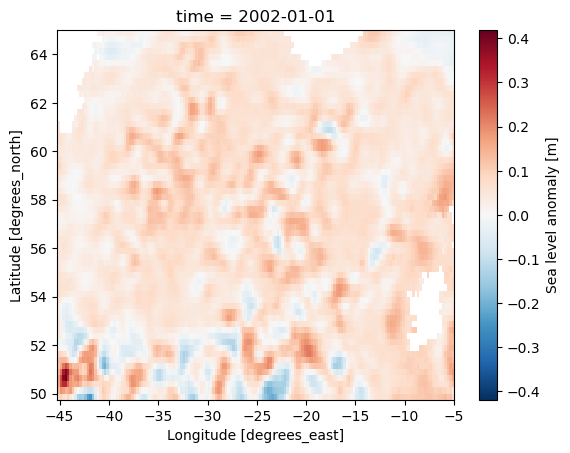

In [4]:
TEddy.rawdata.isel(time=0).plot()

In [5]:
# eddies, discarded = TEddy._detect_one_level(0.01)

In [6]:
lin_levels = np.arange(-0.4,0.4,0.01)

df_eddy_multilevel_store = TEddy._detect_snapshot(0,lin_levels)

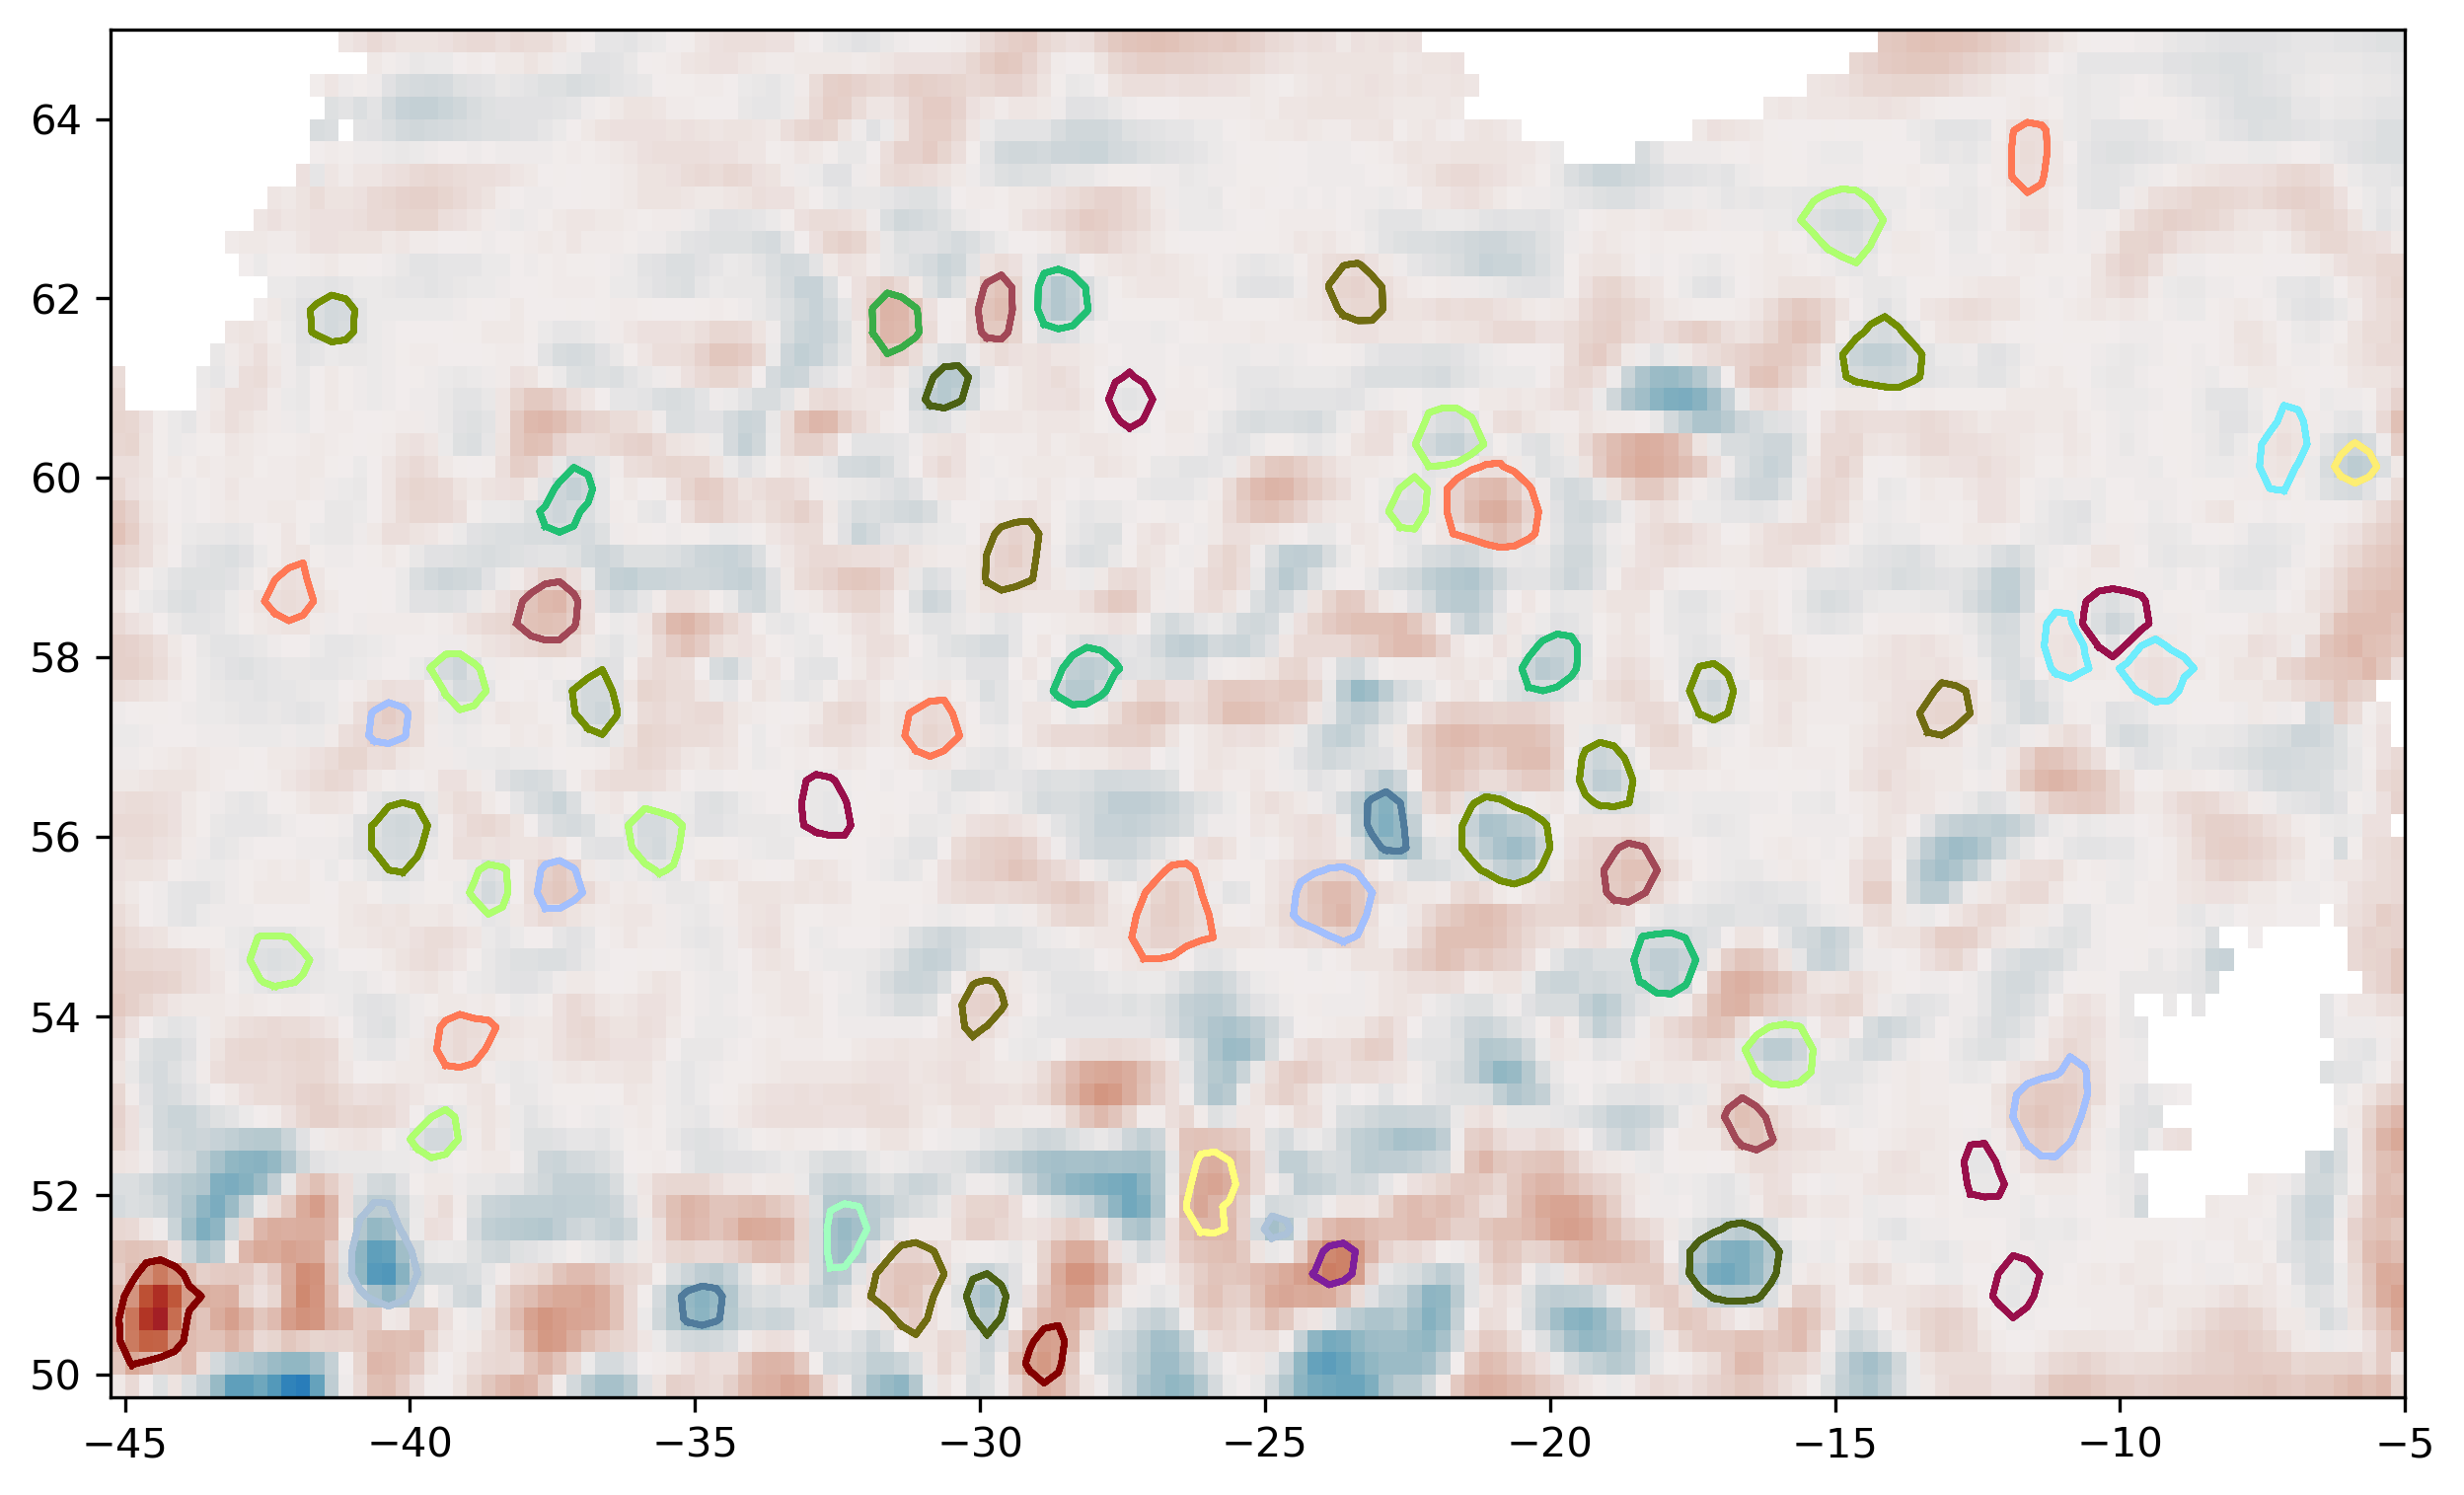

In [7]:
TEddy.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [16]:
track_in_time = TEddy.time_tracking( t0=0,tf=50,lin_levels=lin_levels,ntimes=0 )

0


In [10]:

# def _get_non_duplicated_identifiers(merged_identifiers):
    
#     values, counts = np.unique(merged_identifiers, return_counts=True)

#     duplicated=[]
#     for count in range(0,len(counts)):
#         if counts[count] >=2:
#             duplicated.append(count)

#     values = np.delete(values, duplicated)
#     return values

# time=1
# ntimes=5

# # Move to decorator
# if time < ntimes:
#     ntimes=time
# # Extract identifier of eddies identified as the last imput in the table.
# last_identified_eddies = track_in_time.xs(time,level='time').index.levels[0]

# # Loop and arrays to contain extracted identifier of eddies identified in the last ntimes in the table.
# unlinked_tracks_in_time = last_identified_eddies
# unlinked_times = np.ones_like(last_identified_eddies)*time
# # Loop back in time to check if missing a eddy track
# for prev_time in np.arange(time-ntimes,time):
#     # Extracted identifier of eddies identified in the last time-ntimes in the table.
#     previous_identified_eddies = track_in_time.xs(prev_time,level='time').index.levels[0]

#     merged_identifiers= np.hstack((last_identified_eddies,previous_identified_eddies))
    
#     values = _get_non_duplicated_identifiers(merged_identifiers)

#     unlinked_tracks_in_time = np.hstack((unlinked_tracks_in_time,values))
#     unlinked_times = np.hstack((unlinked_times,np.ones_like(values)*prev_time))

# unlinked_tracks_in_time = np.unique(unlinked_tracks_in_time)

# times = track_in_time.loc[unlinked_tracks_in_time].reset_index().groupby('identifier').max('time')['time'].values

# eddies_to_track = track_in_time.loc[unlinked_tracks_in_time].groupby(['identifier','index']).last('time')

# eddies_to_track['time']=[ times[index] for index,n in eddies_to_track.index]

# eddies_to_track = eddies_to_track.reset_index().set_index(['identifier','time','index'])

# previous_time = eddies_to_track.reindex(track_in_time.index.levels[0],level=0,fill_value=0)


In [11]:
#TODO Check if the function above is doing what we expect.

# ISSUE:
# There seems to be a missmatch between the previous time and the new time in the time_tracking function, particularly when using unlink_eddies_in_previous_times


# IT seems to be doing the right thing, but there are some contours that are been identified that should not, perhaps make the criteria more strict. 


# FIXED:
    # Currently the distance function is doing something strange, but likely it has to do more with the renaming of eddies in time i.e. _rename_eddies_in_time

    # The issue occurs, because passing a detect_nearest an incomplete array with only the times identified at t=time-1, does not match the overall shape of the table, thus there is a shift in the index that is not accounted for.  


In [12]:
track_in_time.loc[10]

contour_path_x  contour_path_y  level    area_eddy  radius_eddy  \
time index                                                                    
0    0          -16.375000       53.366125  -0.02  4460.276920    37.679573   
     1          -16.386248       53.375000  -0.02  4460.276920    37.679573   
     2          -16.578291       53.625000  -0.02  4460.276920    37.679573   
     3          -16.375000       53.785834  -0.02  4460.276920    37.679573   
     4          -16.155867       53.875000  -0.02  4460.276920    37.679573   
     5          -16.125000       53.882553  -0.02  4460.276920    37.679573   
     6          -15.875000       53.908809  -0.02  4460.276920    37.679573   
     7          -15.625000       53.885030  -0.02  4460.276920    37.679573   
     8          -15.598197       53.875000  -0.02  4460.276920    37.679573   
     9          -15.382924       53.625000  -0.02  4460.276920    37.679573   
     10         -15.416934       53.375000  -0.02  4460.276920    37.679573   
     11         -15.625000       53.259472  -0.02  4460.276920    37.679573   
     12         -15.875000       53.226305  -0.02  4460.276920    37.679573   
     13         -16.125000       53.246497  -0.02  4460.276920    37.679573   
     14         -16.375000       53.366125  -0.02  4460.276920    37.679573   
1    0          -16.125000       53.368572  -0.04  1991.823497    25.179696   
     1          -16.141178       53.375000  -0.04  1991.823497    25.179696   
     2          -16.375000       53.554884  -0.04  1991.823497    25.179696   
     3          -16.421505       53.625000  -0.04  1991.823497    25.179696   
     4          -16.375000       53.668139  -0.04  1991.823497    25.179696   
     5          -16.125000       53.800986  -0.04  1991.823497    25.179696   
     6          -15.875000       53.837777  -0.04  1991.823497    25.179696   
     7          -15.625000       53.700987  -0.04  1991.823497    25.179696   
     8          -15.557760       53.625000  -0.04  1991.823497    25.179696   
     9          -15.625000       53.510269  -0.04  1991.823497    25.179696   
     10         -15.875000       53.377936  -0.04  1991.823497    25.179696   
     11         -15.942303       53.375000  -0.04  1991.823497    25.179696   
     12         -16.125000       53.368572  -0.04  1991.823497    25.179696   
2    0          -16.125000       53.365703  -0.04  2059.913969    25.606464   
     1          -16.146713       53.375000  -0.04  2059.913969    25.606464   
     2          -16.375000       53.546372  -0.04  2059.913969    25.606464   
     3          -16.431805       53.625000  -0.04  2059.913969    25.606464   
     4          -16.375000       53.682159  -0.04  2059.913969    25.606464   
     5          -16.125000       53.814855  -0.04  2059.913969    25.606464   
     6          -15.875000       53.837939  -0.04  2059.913969    25.606464   
     7          -15.625000       53.728838  -0.04  2059.913969    25.606464   
     8          -15.540307       53.625000  -0.04  2059.913969    25.606464   
     9          -15.625000       53.520169  -0.04  2059.913969    25.606464   
     10         -15.875000       53.393396  -0.04  2059.913969    25.606464   
     11         -16.026826       53.375000  -0.04  2059.913969    25.606464   
     12         -16.125000       53.365703  -0.04  2059.913969    25.606464   

            ellipse_params_a  ellipse_params_b  ellipse_params_theta  \
time index                                                             
0    0              0.604202          0.342770             -0.016186   
     1              0.604202          0.342770             -0.016186   
     2              0.604202          0.342770             -0.016186   
     3              0.604202          0.342770             -0.016186   
     4              0.604202          0.342770             -0.016186   
     5              0.604202          0.342770             -0.016186   
     6              0.604202          

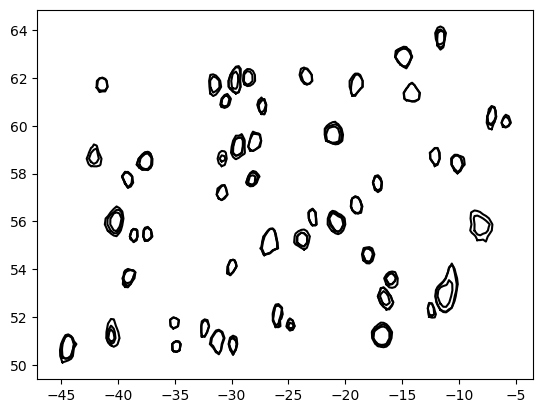

In [13]:
# colors = ['r','b','k','g','m','orange','pink','cyan','gray','steelblue']
for eddy in track_in_time.index.get_level_values(level=0).unique():
    times = track_in_time.loc[eddy].index.get_level_values(level=0).unique()
    # num_colors = times.max()

    if len(times)<2:
        continue

    for time in times:
        x_contour = track_in_time.loc[eddy,time].contour_path_x
        y_contour = track_in_time.loc[eddy,time].contour_path_y 

        plt.plot(x_contour,y_contour,linestyle='-',color='k')
    
    # plt.title(eddy)
    # plt.show()

    

In [14]:
track_in_time.loc[10]

contour_path_x  contour_path_y  level    area_eddy  radius_eddy  \
time index                                                                    
0    0          -16.375000       53.366125  -0.02  4460.276920    37.679573   
     1          -16.386248       53.375000  -0.02  4460.276920    37.679573   
     2          -16.578291       53.625000  -0.02  4460.276920    37.679573   
     3          -16.375000       53.785834  -0.02  4460.276920    37.679573   
     4          -16.155867       53.875000  -0.02  4460.276920    37.679573   
     5          -16.125000       53.882553  -0.02  4460.276920    37.679573   
     6          -15.875000       53.908809  -0.02  4460.276920    37.679573   
     7          -15.625000       53.885030  -0.02  4460.276920    37.679573   
     8          -15.598197       53.875000  -0.02  4460.276920    37.679573   
     9          -15.382924       53.625000  -0.02  4460.276920    37.679573   
     10         -15.416934       53.375000  -0.02  4460.276920    37.679573   
     11         -15.625000       53.259472  -0.02  4460.276920    37.679573   
     12         -15.875000       53.226305  -0.02  4460.276920    37.679573   
     13         -16.125000       53.246497  -0.02  4460.276920    37.679573   
     14         -16.375000       53.366125  -0.02  4460.276920    37.679573   
1    0          -16.125000       53.368572  -0.04  1991.823497    25.179696   
     1          -16.141178       53.375000  -0.04  1991.823497    25.179696   
     2          -16.375000       53.554884  -0.04  1991.823497    25.179696   
     3          -16.421505       53.625000  -0.04  1991.823497    25.179696   
     4          -16.375000       53.668139  -0.04  1991.823497    25.179696   
     5          -16.125000       53.800986  -0.04  1991.823497    25.179696   
     6          -15.875000       53.837777  -0.04  1991.823497    25.179696   
     7          -15.625000       53.700987  -0.04  1991.823497    25.179696   
     8          -15.557760       53.625000  -0.04  1991.823497    25.179696   
     9          -15.625000       53.510269  -0.04  1991.823497    25.179696   
     10         -15.875000       53.377936  -0.04  1991.823497    25.179696   
     11         -15.942303       53.375000  -0.04  1991.823497    25.179696   
     12         -16.125000       53.368572  -0.04  1991.823497    25.179696   
2    0          -16.125000       53.365703  -0.04  2059.913969    25.606464   
     1          -16.146713       53.375000  -0.04  2059.913969    25.606464   
     2          -16.375000       53.546372  -0.04  2059.913969    25.606464   
     3          -16.431805       53.625000  -0.04  2059.913969    25.606464   
     4          -16.375000       53.682159  -0.04  2059.913969    25.606464   
     5          -16.125000       53.814855  -0.04  2059.913969    25.606464   
     6          -15.875000       53.837939  -0.04  2059.913969    25.606464   
     7          -15.625000       53.728838  -0.04  2059.913969    25.606464   
     8          -15.540307       53.625000  -0.04  2059.913969    25.606464   
     9          -15.625000       53.520169  -0.04  2059.913969    25.606464   
     10         -15.875000       53.393396  -0.04  2059.913969    25.606464   
     11         -16.026826       53.375000  -0.04  2059.913969    25.606464   
     12         -16.125000       53.365703  -0.04  2059.913969    25.606464   

            ellipse_params_a  ellipse_params_b  ellipse_params_theta  \
time index                                                             
0    0              0.604202          0.342770             -0.016186   
     1              0.604202          0.342770             -0.016186   
     2              0.604202          0.342770             -0.016186   
     3              0.604202          0.342770             -0.016186   
     4              0.604202          0.342770             -0.016186   
     5              0.604202          0.342770             -0.016186   
     6              0.604202          

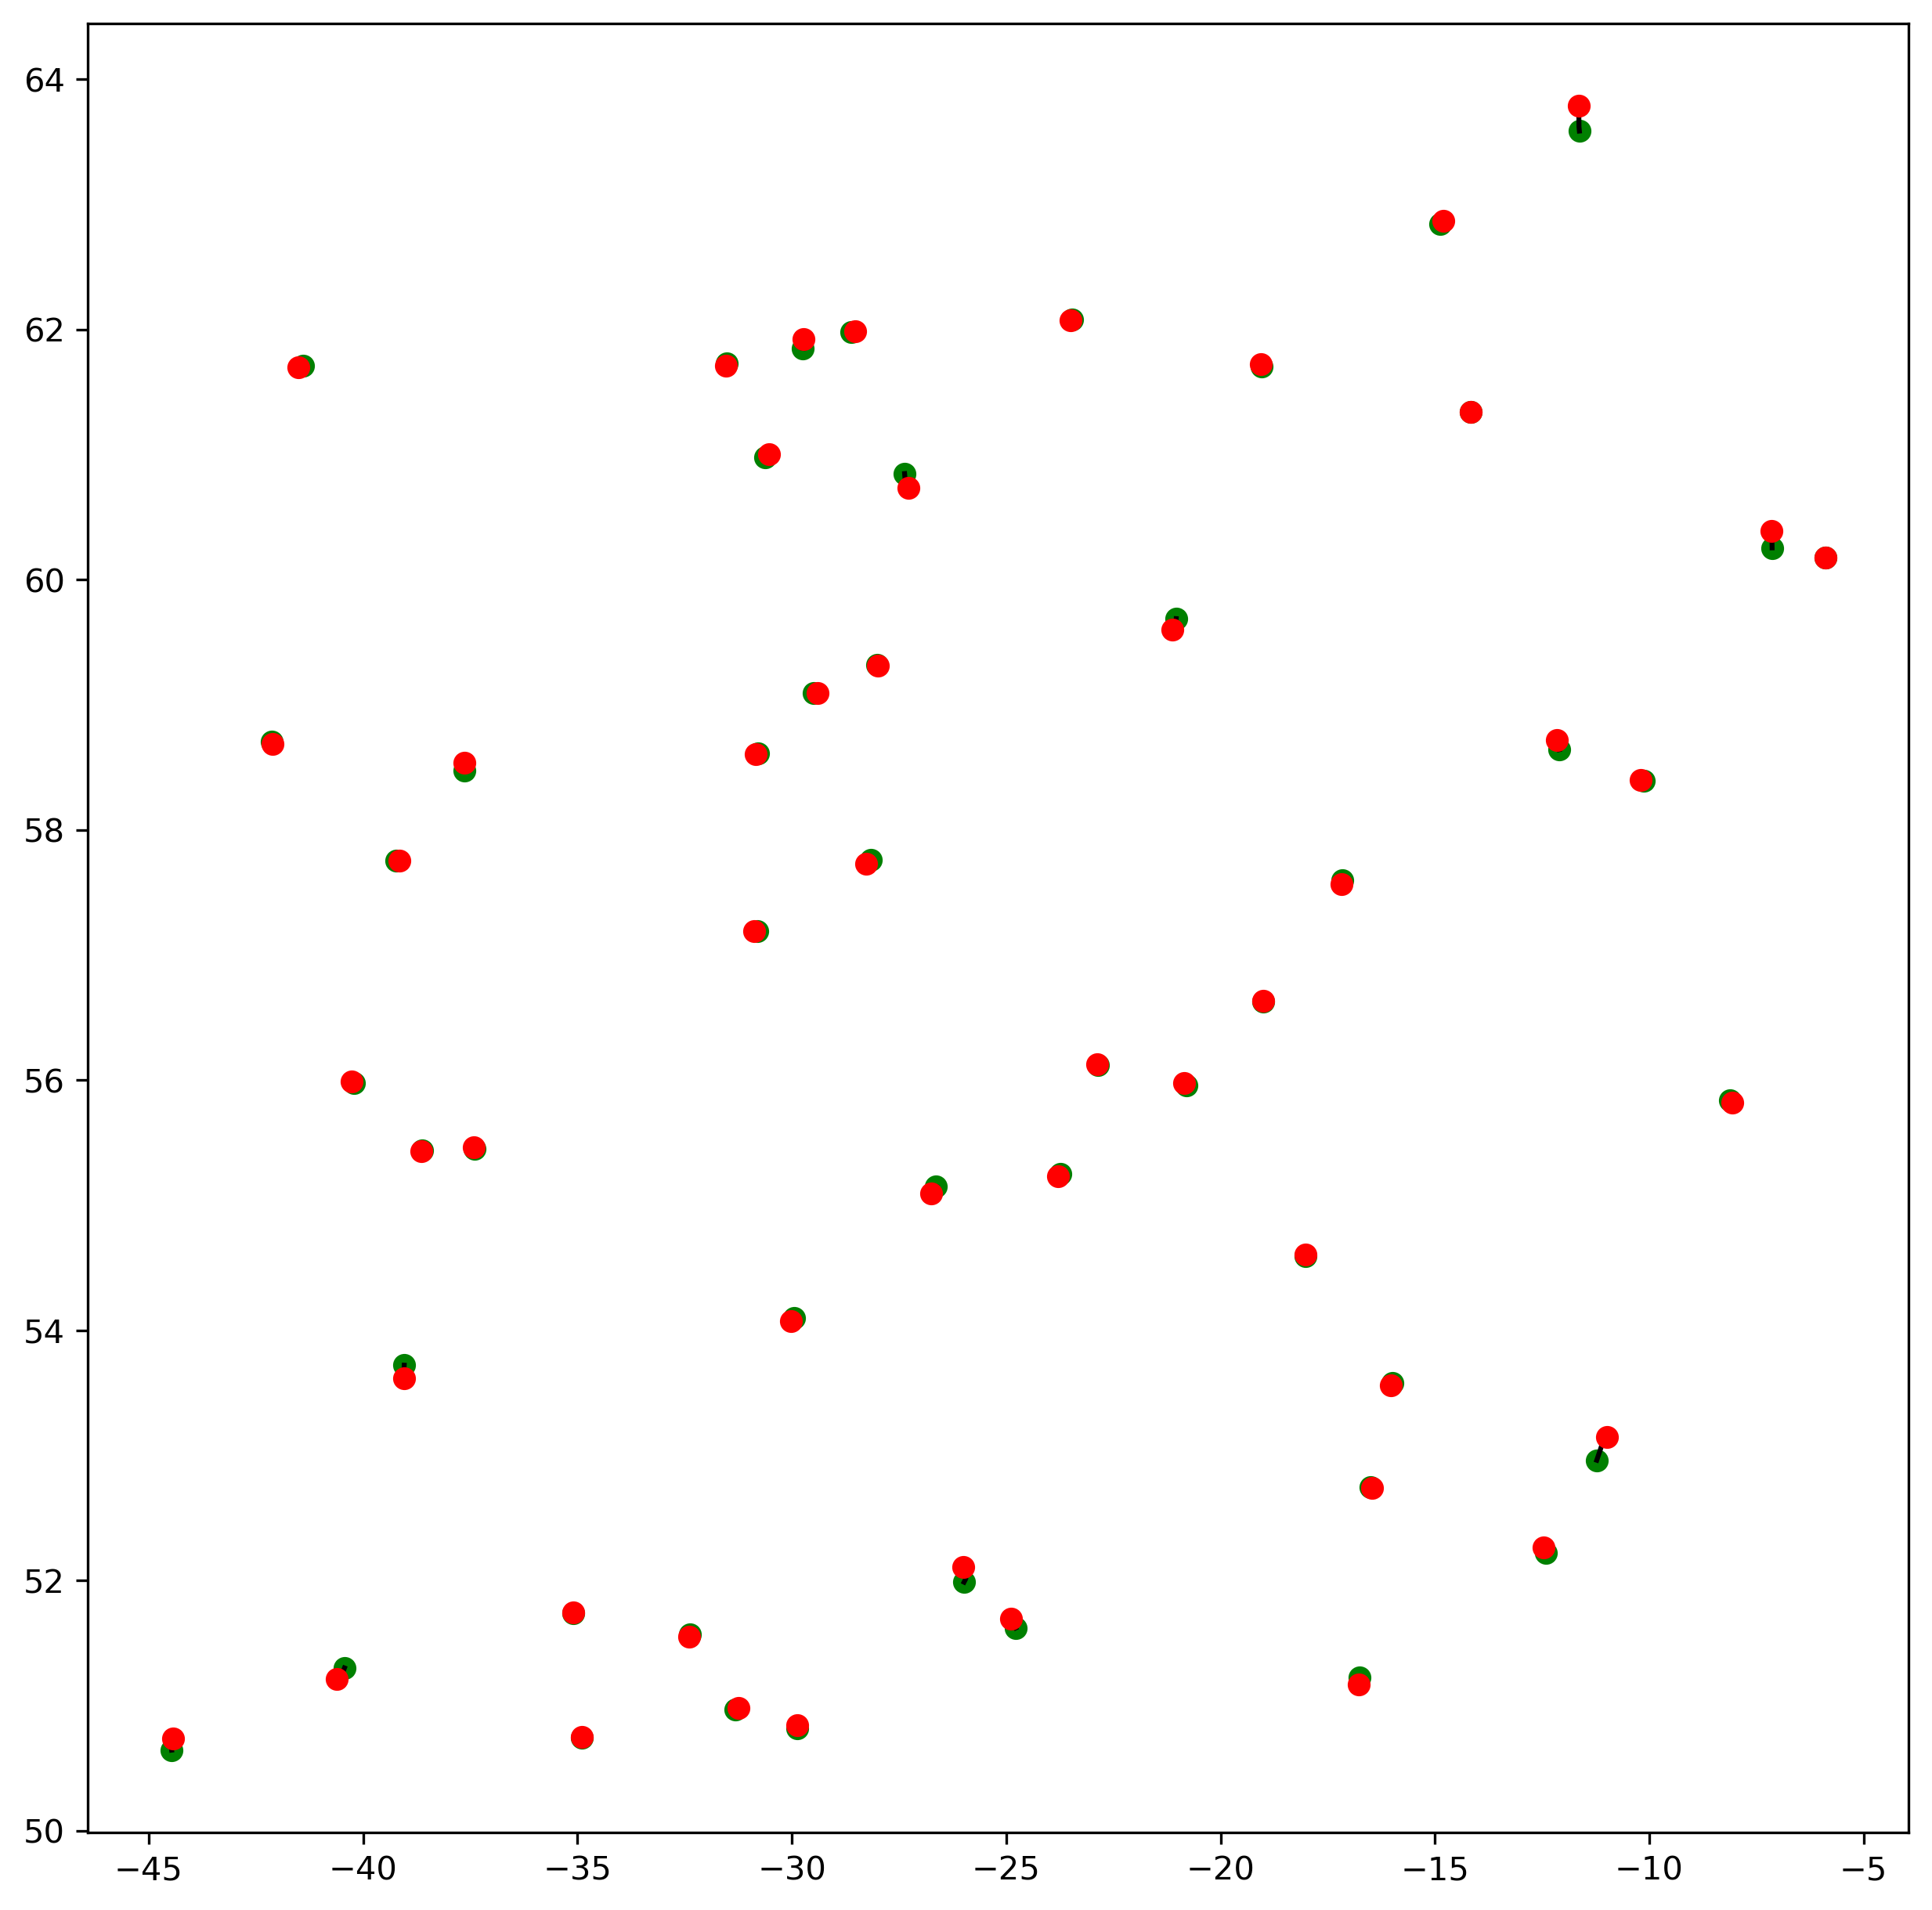

In [15]:
plt.figure(figsize=(10,10),dpi=300)

for eddy in track_in_time.index.get_level_values(level=0).unique():
    times = track_in_time.loc[eddy].index.get_level_values(level=0).unique()
    # num_colors = times.max()

    if len(times)<2:
        continue
    
    # for time in times:
    x_contour = track_in_time.loc[eddy,:,0].contour_x.values
    y_contour = track_in_time.loc[eddy,:,0].contour_y.values

    plt.plot(x_contour[0],y_contour[0],marker='o',color='g')
    plt.plot(x_contour,y_contour,linestyle='-',color='k')
    plt.plot(x_contour[-1],y_contour[-1],marker='o',color='r')
    
    # plt.title(eddy)
    # plt.show()

    

In [37]:
track_in_time.loc[0,:]#.contour_x

contour_path_x  contour_path_y  level    area_eddy  radius_eddy  \
time index                                                                    
0    0          -40.625000       50.827853  -0.07  7304.454075    48.219083   
     1          -40.758780       50.875000  -0.07  7304.454075    48.219083   
     2          -40.875000       50.949114  -0.07  7304.454075    48.219083   
     3          -41.027495       51.125000  -0.07  7304.454075    48.219083   
     4          -41.016358       51.375000  -0.07  7304.454075    48.219083   
...                    ...             ...    ...          ...          ...   
9    6          -34.464979       50.875000  -0.11  1954.707514    24.943992   
     7          -34.584373       50.625000  -0.11  1954.707514    24.943992   
     8          -34.625000       50.603061  -0.11  1954.707514    24.943992   
     9          -34.875000       50.572114  -0.11  1954.707514    24.943992   
     10         -35.125000       50.623736  -0.11  1954.707514    24.943992   

            ellipse_params_a  ellipse_params_b  ellipse_params_theta  \
time index                                                             
0    0              0.624478          0.520122             -0.794291   
     1              0.624478          0.520122             -0.794291   
     2              0.624478          0.520122             -0.794291   
     3              0.624478          0.520122             -0.794291   
     4              0.624478          0.520122             -0.794291   
...                      ...               ...                   ...   
9    6              0.372837          0.248787              0.223286   
     7              0.372837          0.248787              0.223286   
     8              0.372837          0.248787              0.223286   
     9              0.372837          0.248787              0.223286   
     10             0.372837          0.248787              0.223286   

            contour_ellipse_error  ellipse_eccen  ...  eddy_sign    maxima  \
time index                                        ...                        
0    0                     0.5868       0.553439  ...       -1.0 -0.213197   
     1                     0.5868       0.553439  ...       -1.0 -0.213197   
     2                     0.5868       0.553439  ...       -1.0 -0.213197   
     3                     0.5868       0.553439  ...       -1.0 -0.213197   
     4                     0.5868       0.553439  ...       -1.0 -0.213197   
...                           ...            ...  ...        ...       ...   
9    6                     0.4648       0.744807  ...       -1.0 -0.144864   
     7                     0.4648       0.744807  ...       -1.0 -0.144864   
     8                     0.4648       0.744807  ...       -1.0 -0.144864   
     9                     0.4648       0.744807  ...       -1.0 -0.144864   
     10                    0.4648       0.744807  ...       -1.0 -0.144864   

            maxima_y  maxima_x  gaussian_params_x  gaussian_params_y  \
time index                                                             
0    0        51.125   -40.375            -40.375             51.125   
     1        51.125   -40.375            -40.375             51.125   
     2        51.125   -40.375            -40.375             51.125   
     3        51.125   -40.375            -40.375             51.125   
     4        51.125   -40.375            -40.375             51.125   
...              ...       ...                ...                ...   
9    6        50.875   -34.875            -34.875             50.875   
     7        50.875   -34.875            -34.875             50.875   
     8        50.875   -34.875            -34.875             50.875   
     9        50.875   -34.875            -34.875             50.875   
     10       50.875   -34.875            -34.875             50.875   

            gaussian_params_sigma_x  gaussian_params_sigma_y  \
time index                     

In [ ]:
tracked_eddies = tracked_eddies.reset_index().set_index(['identifier','time','index']).sort_index(level=1)

In [ ]:
tracked_eddies.loc[0]

In [ ]:
test.reset_index().set_index(['time','identifier','index'])#.loc[index[near][0]]

In [ ]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm

In [ ]:
filepath = '/Users/jmtzmo/Downloads/sla_for_tracking/interp_for_tracking/sla_0.25degs_interp_for_eddy_tracking_NATL.nc'

In [ ]:
TEddy_model = TrackEddy(path=filepath,variable='sla')

In [ ]:
TEddy_model.identification_criteria['gaussian_fit']=0.5
TEddy_model.identification_criteria['eccentricity']=0.9
# TEddy_model.skip_gaussian_fit = True

In [ ]:
TEddy_model._filter_data_(TEddy_model.rawdata.isel(time_dim=0),filter='space')
eddies, discarded = TEddy_model._detect_one_level(0.1)

In [ ]:
discarded

In [ ]:
TEddy_model.plot_eddy_detection_in_level(eddies, discarded,markersize=5)

In [ ]:
lin_levels = np.arange(-0.4,0.4,0.01)

df_eddy_multilevel_store = TEddy_model._detect_snapshot(0,lin_levels)

In [ ]:
df_eddy_multilevel_store#.loc[3]

In [ ]:
TEddy_model.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [ ]:
positive_eddy_field=reconstruct_syntetic(shape(sla_model),lon_model[0,:], lat_model[:,0],positive_eddies_model)

In [ ]:
levels2 = {'max':np.min(sla_model), 'min':0, 'step':-0.01}

negative_eddies_model=analyseddyzt (sla_model, lon_model[0,:], lat_model[:,0], 0, 1, 1, levels2, preferences=preferences, areamap=areamap,
areaparms=checkarea, filters=filters, maskopt='gaussian', diagnostics=False,pprint=True)

In [ ]:
negative_eddy_field=reconstruct_syntetic(shape(sla_model),lon_model[0,:], lat_model[:,0],negative_eddies_model)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon_model,lat_model,sla_model[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

ax[1].pcolormesh(lon_model,lat_model,positive_eddy_field[0,:,:]+negative_eddy_field[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon,lat,sla[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

for eddy in positive_eddies:
    eddy
    ax[0].plot(positive_eddies[eddy]['contour'][0][0],positive_eddies[eddy]['contour'][0][1])

for eddy in negative_eddies:
    ax[0].plot(negative_eddies[eddy]['contour'][0][0],negative_eddies[eddy]['contour'][0][1])


ax[1].pcolormesh(lon_model,lat_model,sla_model[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

for eddy in positive_eddies_model:
    eddy
    ax[1].plot(positive_eddies_model[eddy]['contour'][0][0],positive_eddies_model[eddy]['contour'][0][1])

for eddy in negative_eddies_model:
    ax[1].plot(negative_eddies_model[eddy]['contour'][0][0],negative_eddies_model[eddy]['contour'][0][1])


ax[0].set_title('Satellite')

ax[1].set_title('Model')
